# 📈 Análise - **Australian Road Deaths Database**

---

- Parte 02 - Processo Seletivo Stepps

## 📚 Importar Libraries & Ler Arquivo



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/CrashData.csv', low_memory=False)

## 😵 Análise da média das idades de óbito (2021)



In [ ]:
# Filtrar os dados para o ano de 2021 e os gêneros masculino e feminino
filtered_data = data[(data['Year'] == 2021) & (data['Gender'].isin(['Male', 'Female']))]

# Calcular a média de idade por gênero
mean_age_by_gender = filtered_data.groupby('Gender')['Age'].mean()

# Exibir os resultados
print('Média de Idade das Pessoas que Morreram em Acidentes de Trânsito (2021):')
print('\nGenero \t  Idade')
mean_age_string = str(mean_age_by_gender)
lines_to_print = mean_age_string.split('\n')[1:-1]
for line in lines_to_print:
    print(line)

Média de Idade das Pessoas que Morreram em Acidentes de Trânsito (2021)

Genero 	  Idade
Female    49.753555
Male      42.736926


### 📊 Gráfico da média das idades de óbito (2021)



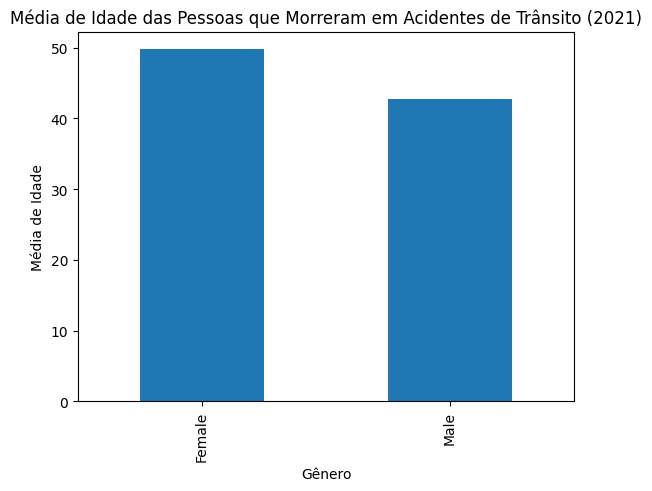

In [27]:
# Exibir os resultados em grafico de barras
mean_age_by_gender.plot(kind='bar')

plt.title('Média de Idade das Pessoas que Morreram em Acidentes de Trânsito (2021)')
plt.xlabel('Gênero')
plt.ylabel('Média de Idade')

plt.show()

## 👥 Análise da distribuição dos grupos de idade



In [30]:
filtered_data = data[['Age Group', 'Crash Type']]

# Contar a frequência de cada combinação de grupo de idade e tipo de acidente
grouped_data = filtered_data.groupby(['Age Group', 'Crash Type']).size().unstack()

print('Distribuição dos Grupos de Idade por Tipo de Acidente: \n')
print(grouped_data)

Distribuição dos Grupos de Idade por Tipo de Acidente: 

Crash Type   Multiple  Single
Age Group                    
0_to_16          1703    2377
17_to_25         5359    8412
26_to_39         5358    7006
40_to_64         6562    6853
65_to_74         2064    1949
75_or_older      2502    2608


### 📊 Gráfico da distribuição dos grupos de idade




#### Gráfico em barra (Proporção em números absolutos)

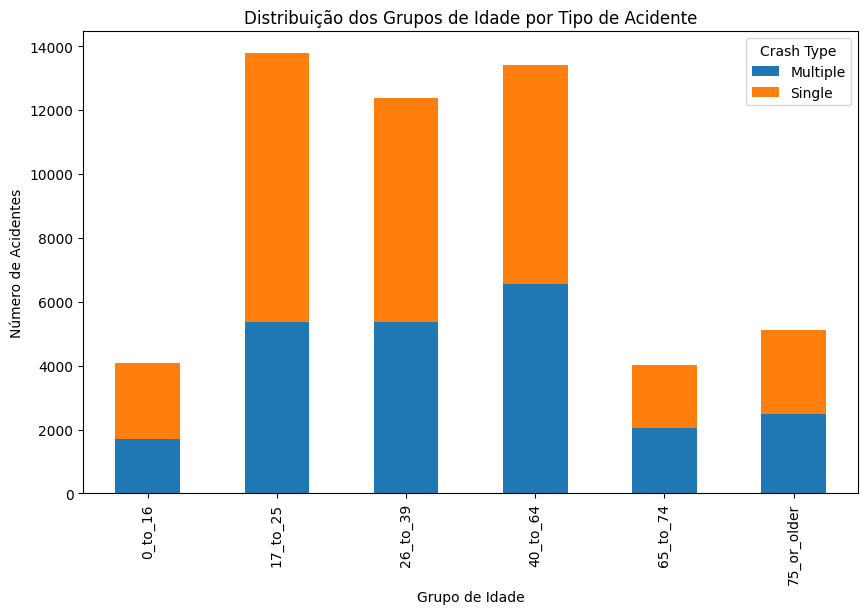

In [31]:
# Calcular as proporções por tipo de acidente
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Plotar gráfico de barras para cada grupo de idade
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribuição dos Grupos de Idade por Tipo de Acidente')
plt.xlabel('Grupo de Idade')
plt.ylabel('Número de Acidentes')

plt.show()

#### Gráfico em pizza (Proporção em porcentagem)

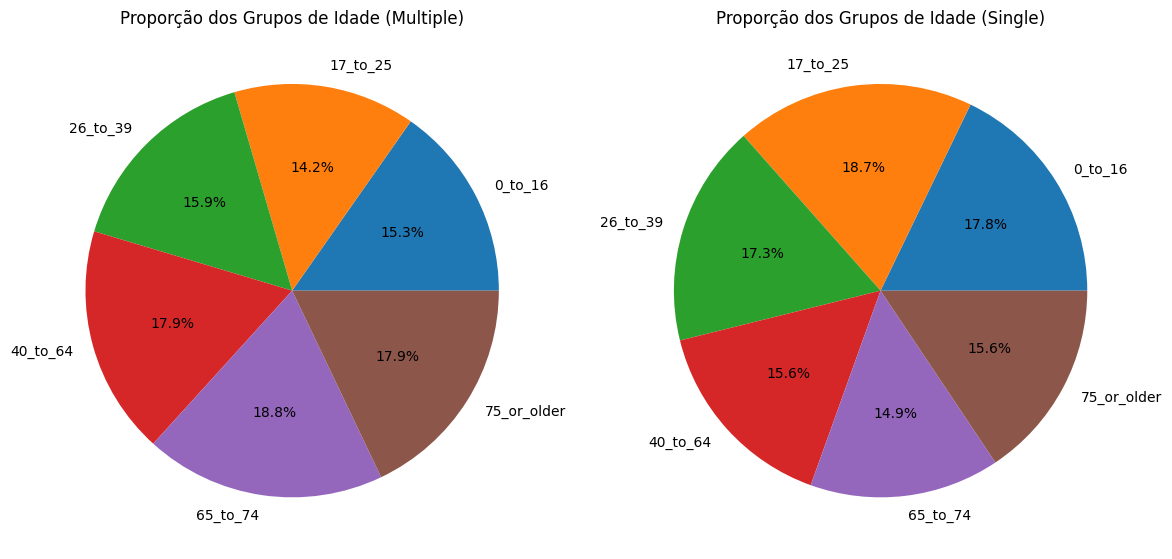

In [16]:
# Plotar gráfico de pizza para cada tipo de acidente
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de pizza para o tipo de acidente Multiple
axes[0].pie(proportions['Multiple'], labels=proportions.index, autopct='%1.1f%%')
axes[0].set_title('Proporção dos Grupos de Idade (Multiple)')

# Gráfico de pizza para o tipo de acidente Single
axes[1].pie(proportions['Single'], labels=proportions.index, autopct='%1.1f%%')
axes[1].set_title('Proporção dos Grupos de Idade (Single)')

plt.tight_layout()
plt.show()